In [1]:
import pandas as pd
import matplotlib.pyplot as plt


from google.colab import files
uploaded = files.upload()
print(uploaded)

Saving coviddataset.csv to coviddataset.csv
{'coviddataset.csv': b'Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered\n2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0\n2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0\n2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0\n2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0\n2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0\n2020-02-04,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0\n2020-02-05,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0\n2020-02-06,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0\n2020-02-07,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0\n2020-02-08,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0\n2020-02-09,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0\n2020-02-10,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0\n2020-02-11,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0\n2020-02-12,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0\n2020-02-13,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0\n2020-02-14,Kerala,10.8505,76.2711,3

In [2]:
df = pd.read_csv("coviddataset.csv")
df.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0


In [3]:
#checking for the missing values

print("Missing values before conversion:\n", df.isnull().sum())

#Convert 'Death' column to numeric
df['Death'] = pd.to_numeric(df['Death'], errors='coerce')

print("Missing values after conversion:\n", df.isnull().sum())

Missing values before conversion:
 Date                         0
Name of State / UT           0
Latitude                     0
Longitude                    0
Total Confirmed cases        0
Death                        0
Cured/Discharged/Migrated    0
New cases                    0
New deaths                   0
New recovered                0
dtype: int64
Missing values after conversion:
 Date                         0
Name of State / UT           0
Latitude                     0
Longitude                    0
Total Confirmed cases        0
Death                        1
Cured/Discharged/Migrated    0
New cases                    0
New deaths                   0
New recovered                0
dtype: int64


In [4]:
## Display basic statistics for all columns (numeric and categorical)

print("\nBasic Statistics:\n", df.describe(include='all'))


Basic Statistics:
               Date Name of State / UT     Latitude    Longitude  \
count         4692               4692  4692.000000  4692.000000   
unique         186                 40          NaN          NaN   
top     2020-06-06             Kerala          NaN          NaN   
freq            35                186          NaN          NaN   
mean           NaN                NaN    23.185327    81.451837   
std            NaN                NaN     6.635913     6.959475   
min            NaN                NaN     0.000000     0.000000   
25%            NaN                NaN    18.112400    76.271100   
50%            NaN                NaN    23.940800    79.019300   
75%            NaN                NaN    28.218000    85.313100   
max            NaN                NaN    34.299600    94.727800   

        Total Confirmed cases         Death  Cured/Discharged/Migrated  \
count             4692.000000   4691.000000                4692.000000   
unique                    N

In [5]:
# Display the first 5 rows of data where the state/UT name is 'Kerala'

print("\nKerala Data (first 5 rows):\n", df[df['Name of State / UT'] == "Kerala"].head())


Kerala Data (first 5 rows):
          Date Name of State / UT  Latitude  Longitude  Total Confirmed cases  \
0  2020-01-30             Kerala   10.8505    76.2711                    1.0   
1  2020-01-31             Kerala   10.8505    76.2711                    1.0   
2  2020-02-01             Kerala   10.8505    76.2711                    2.0   
3  2020-02-02             Kerala   10.8505    76.2711                    3.0   
4  2020-02-03             Kerala   10.8505    76.2711                    3.0   

   Death  Cured/Discharged/Migrated  New cases  New deaths  New recovered  
0    0.0                        0.0          0           0              0  
1    0.0                        0.0          0           0              0  
2    0.0                        0.0          1           0              0  
3    0.0                        0.0          1           0              0  
4    0.0                        0.0          0           0              0  


In [6]:
#Grouping is done here

# Get the latest available date in the dataset
latest_date = df['Date'].max()
latest_data = df[df['Date'] == latest_date]

# Find total confirmed cases by state and sort in descending order
grouped_cases = latest_data.groupby("Name of State / UT")["Total Confirmed cases"].sum().sort_values(ascending=False)
print("\nTop 10 States by Confirmed Cases:\n", grouped_cases.head(10))

 # Sorting: Top 5 States by Deaths on basis of numbers

top_deaths = latest_data.groupby("Name of State / UT")["Death"].sum().sort_values(ascending=False).head(5)
print("\nTop 5 States by Deaths:\n", top_deaths)

# Check Duplicates
print("\nNumber of Duplicate Rows:", df.duplicated().sum())


Top 10 States by Confirmed Cases:
 Name of State / UT
Maharashtra       468265.0
Tamil Nadu        273460.0
Andhra Pradesh    186461.0
Karnataka         151449.0
Delhi             140232.0
Uttar Pradesh     104388.0
West Bengal        83800.0
Telangana          73050.0
Gujarat            66669.0
Bihar              64770.0
Name: Total Confirmed cases, dtype: float64

Top 5 States by Deaths:
 Name of State / UT
Maharashtra    16476.0
Tamil Nadu      4461.0
Delhi           4044.0
Karnataka       2804.0
Gujarat         2556.0
Name: Death, dtype: float64

Number of Duplicate Rows: 0


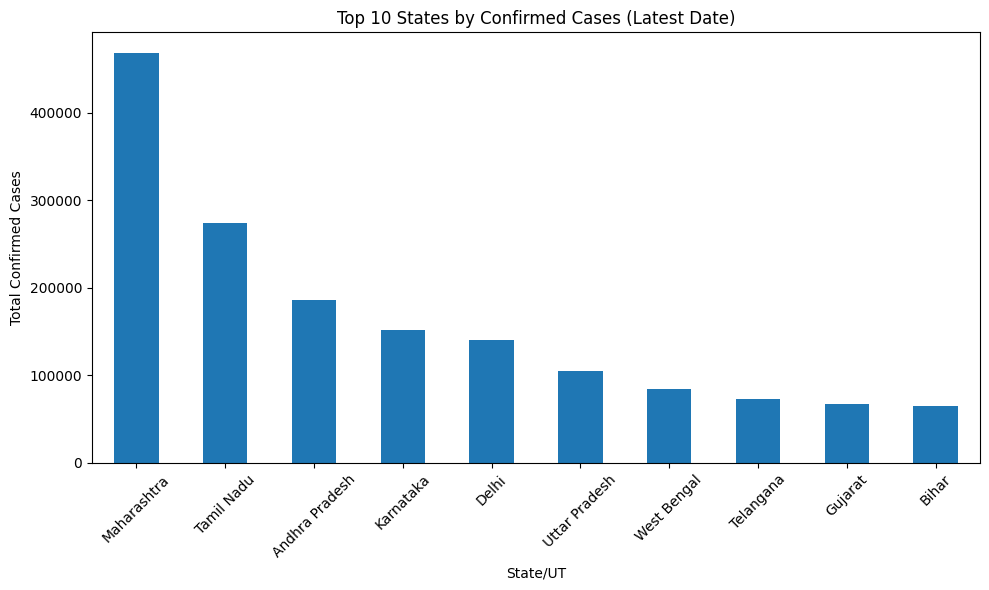

In [7]:
#visualization

## Create a new barchart and set its size

plt.figure(figsize=(10,6))
grouped_cases.head(10).plot(kind='bar')

# Add chart title and axis labels
plt.title("Top 10 States by Confirmed Cases (Latest Date)")
plt.xlabel("State/UT")
plt.ylabel("Total Confirmed Cases")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [8]:
#Data Aggregation

# 1. Total confirmed cases, deaths, and recoveries per state (latest date)
agg_state = latest_data.groupby("Name of State / UT").agg({
    "Total Confirmed cases": "sum",
    "Death": "sum",
    "Cured/Discharged/Migrated": "sum"
}).sort_values("Total Confirmed cases", ascending=False)

print("\nState-wise Aggregated Data (Latest Date):\n", agg_state.head(10))

# 2. Aggregation over time (India total cases per date)
agg_date = df.groupby("Date").agg({
    "Total Confirmed cases": "sum",
    "Death": "sum",
    "Cured/Discharged/Migrated": "sum",
    "New cases": "sum",
    "New deaths": "sum",
    "New recovered": "sum"
})

print("\nDate-wise Aggregated Data (India totals):\n", agg_date.head())


State-wise Aggregated Data (Latest Date):
                     Total Confirmed cases    Death  Cured/Discharged/Migrated
Name of State / UT                                                           
Maharashtra                      468265.0  16476.0                   305521.0
Tamil Nadu                       273460.0   4461.0                   214815.0
Andhra Pradesh                   186461.0   1681.0                   104354.0
Karnataka                        151449.0   2804.0                    74679.0
Delhi                            140232.0   4044.0                   126116.0
Uttar Pradesh                    104388.0   1857.0                    60558.0
West Bengal                       83800.0   1846.0                    58962.0
Telangana                         73050.0    589.0                    52103.0
Gujarat                           66669.0   2556.0                    49433.0
Bihar                             64770.0    355.0                    42414.0

Date-wise Aggregate

In [9]:
# 4. Pivot table (alternative way)
pivot_table = pd.pivot_table(
    df,
    values="Total Confirmed cases",
    index="Name of State / UT",
    columns="Date",
    aggfunc="sum"
)
print("\nPivot Table (State x Date):\n", pivot_table.head())


Pivot Table (State x Date):
 Date                         2020-01-30  2020-01-31  2020-02-01  2020-02-02  \
Name of State / UT                                                            
Andaman and Nicobar Islands         NaN         NaN         NaN         NaN   
Andhra Pradesh                      NaN         NaN         NaN         NaN   
Arunachal Pradesh                   NaN         NaN         NaN         NaN   
Assam                               NaN         NaN         NaN         NaN   
Bihar                               NaN         NaN         NaN         NaN   

Date                         2020-02-03  2020-02-04  2020-02-05  2020-02-06  \
Name of State / UT                                                            
Andaman and Nicobar Islands         NaN         NaN         NaN         NaN   
Andhra Pradesh                      NaN         NaN         NaN         NaN   
Arunachal Pradesh                   NaN         NaN         NaN         NaN   
Assam                

In [10]:
#Manuputation is done here
#Rename the column names for simplicity

df = df.rename(columns={
    "Name of State / UT": "State Name" ,
    "Cured/Discharged/Migrated": "Recovered"
})

# Display the first 5 rows to confirm the changes
print(df.head())

         Date State Name  Latitude  Longitude  Total Confirmed cases  Death  \
0  2020-01-30     Kerala   10.8505    76.2711                    1.0    0.0   
1  2020-01-31     Kerala   10.8505    76.2711                    1.0    0.0   
2  2020-02-01     Kerala   10.8505    76.2711                    2.0    0.0   
3  2020-02-02     Kerala   10.8505    76.2711                    3.0    0.0   
4  2020-02-03     Kerala   10.8505    76.2711                    3.0    0.0   

   Recovered  New cases  New deaths  New recovered  
0        0.0          0           0              0  
1        0.0          0           0              0  
2        0.0          1           0              0  
3        0.0          1           0              0  
4        0.0          0           0              0  
